In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

In [4]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm.csv"

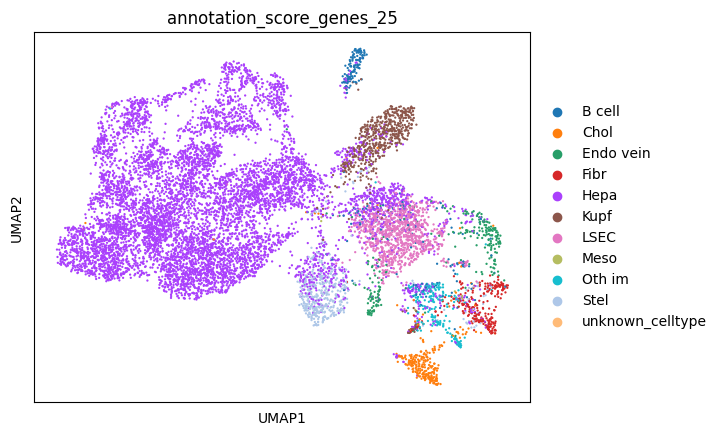

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
                  annotation_score_genes_25
B cell                             2.235483
Chol                               2.431421
Endo vein                          2.253295
Fibr                               2.190951
Hepa                              70.876380
Kupf                               5.343783
LSEC                               9.120057
Meso                               0.062344
Oth im                             1.710011
Stel                               3.767367
unknown_celltype                   0.008906


In [5]:
# Original score_genes with HL marker gene list 
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

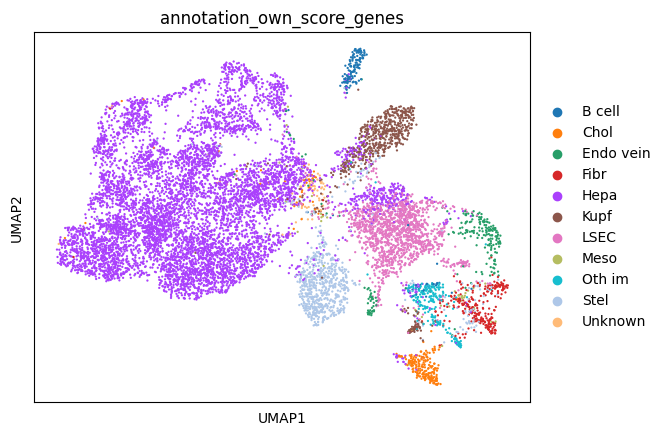

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       1.531885
Chol                         2.280014
Endo vein                    2.021731
Fibr                         2.440328
Hepa                        64.205558
Kupf                         5.664410
LSEC                        12.602423
Meso                         0.400784
Oth im                       1.950481
Stel                         6.296758
Unknown                      0.605629


Hepa      LSEC  Endo vein      Chol      Kupf      Stel      Fibr  \
0      0.518377  0.006058   0.030701  0.085765  0.021587       NaN  0.034497   
1           NaN  0.077458   0.003792       NaN  0.373149       NaN  0.231369   
2           NaN       NaN   0.001595       NaN  0.023841       NaN  0.232491   
3      0.195218       NaN        NaN  0.036456       NaN       NaN  0.122768   
4      0.248247       NaN        NaN  0.069145       NaN  0.052458  0.032160   
...         ...       ...        ...       ...       ...       ...       ...   
11223  0.322433       NaN        NaN  0.059235       NaN  0.054651  0.029201   
11224  0.516080       NaN        NaN  0.081015  0.065312  0.067269  0.041674   
11225  0.348373  0.007146        NaN  0.058203  0.049473       NaN       NaN   
11226       NaN  0.072516        NaN       NaN  0.062516  0.628982  0.337339   
11227  0.305568  0.292362   0.081682  0.058369  0.635198  0.117443  0.071625   

         B cell      Meso    Oth im  
0           NaN       NaN  0.038485  
1           NaN  0.492883       NaN  
2           NaN  0.672062       NaN  
3           NaN  0.214938       NaN  
4           NaN       NaN       NaN  
...         ...       ...       ...  
11223       NaN       NaN       NaN  
11224       NaN       NaN       NaN  
11225       NaN       NaN       NaN  
11226       NaN       NaN       NaN  
11227  0.011332  0.008365  0.032582  

[11228 rows x 10 columns]

In [6]:
# Own score genes with HL marker gene list and just the MinMax scaling
scores = own_score_genes(sdata.table,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

Hepa         0.642056
LSEC         0.126024
Stel         0.062968
Kupf         0.056644
Fibr         0.024403
Chol         0.022800
Endo vein    0.020217
Oth im       0.019505
B cell       0.015319
Unknown      0.006056
Meso         0.004008
Name: annotation_own_score_genes, dtype: float64


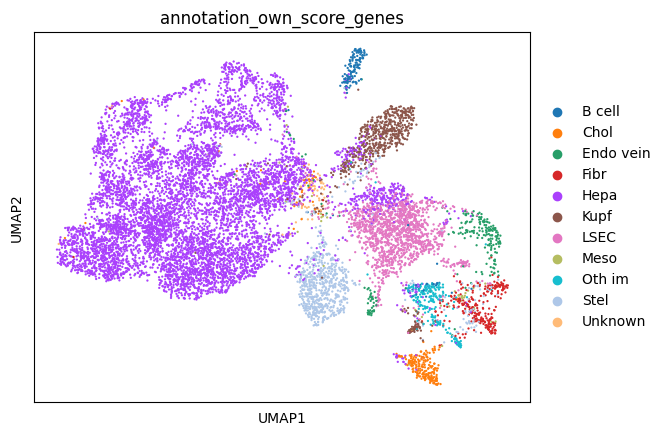

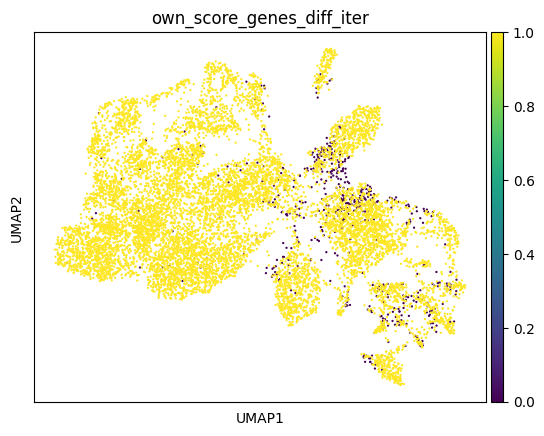

0.052725329533309585


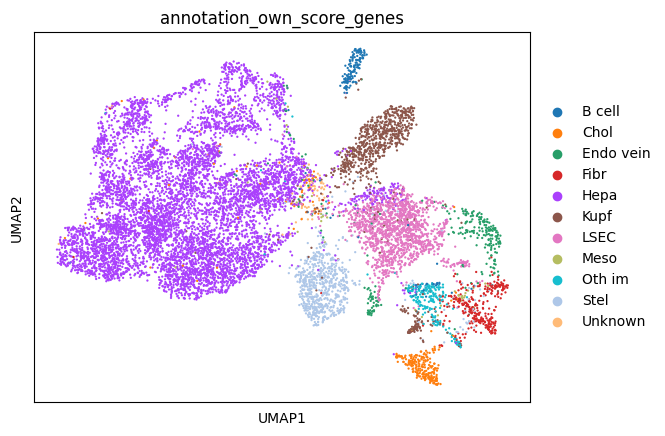

Hepa         0.613644
LSEC         0.128251
Kupf         0.074190
Stel         0.059138
Fibr         0.027520
Chol         0.026630
Endo vein    0.024314
Oth im       0.019327
B cell       0.016744
Unknown      0.006056
Meso         0.004186
Name: annotation_own_score_genes, dtype: float64


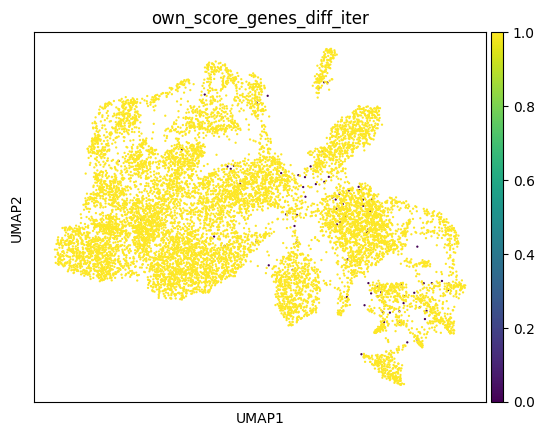

0.007570359814748842


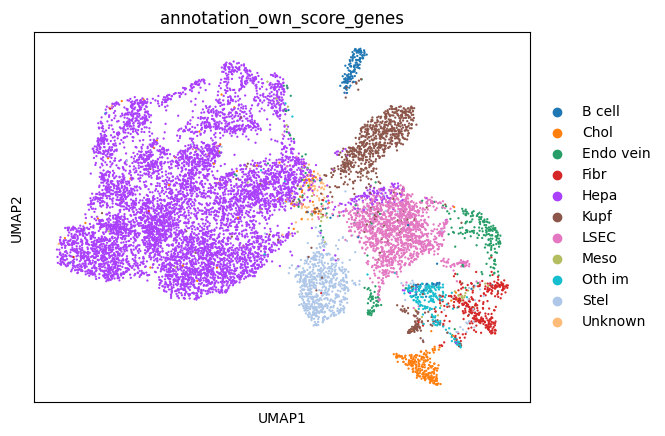

Hepa         0.610616
LSEC         0.127449
Kupf         0.077396
Stel         0.058514
Fibr         0.028945
Chol         0.026719
Endo vein    0.024760
Oth im       0.018970
B cell       0.016120
Unknown      0.006056
Meso         0.004453
Name: annotation_own_score_genes, dtype: float64


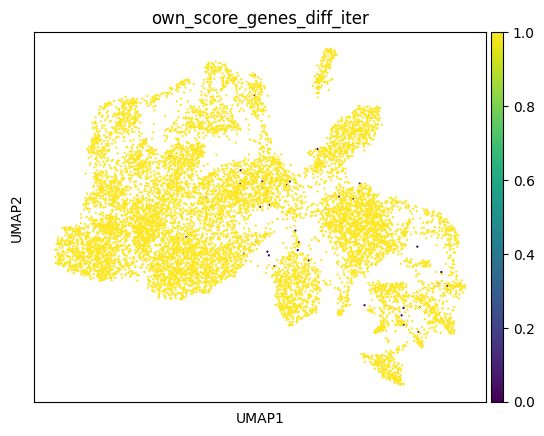

0.003740648379052369


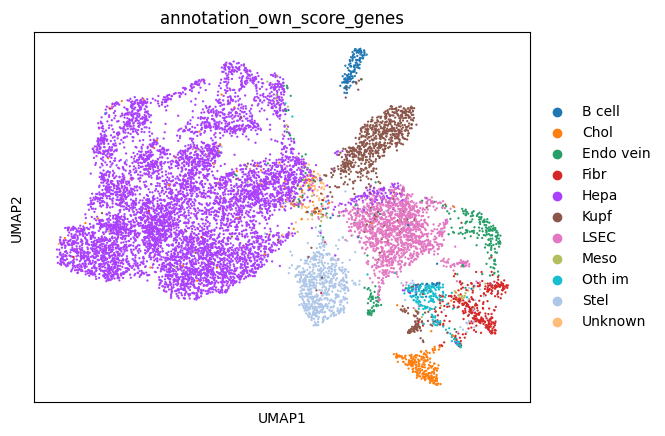

Hepa         0.608657
LSEC         0.128073
Kupf         0.077396
Stel         0.059049
Fibr         0.029836
Chol         0.027788
Endo vein    0.024225
Oth im       0.018347
B cell       0.016120
Unknown      0.006056
Meso         0.004453
Name: annotation_own_score_genes, dtype: float64


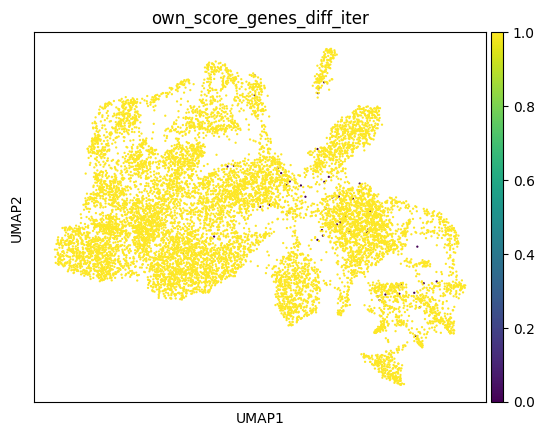

0.004631278945493409


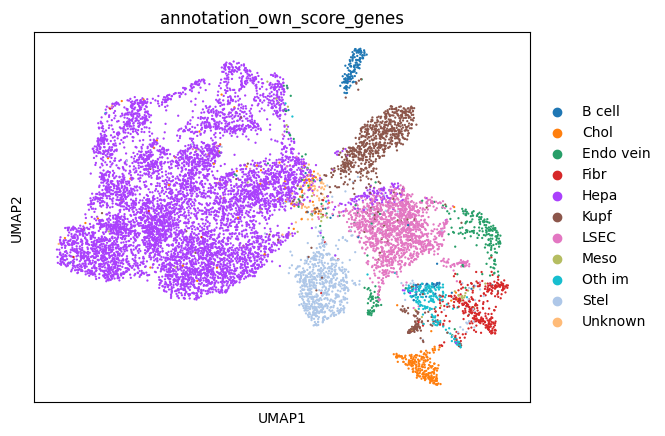

Hepa         0.609815
LSEC         0.127538
Kupf         0.075436
Stel         0.060118
Fibr         0.030014
Chol         0.027520
Endo vein    0.024403
Oth im       0.017724
B cell       0.017189
Unknown      0.006056
Meso         0.004186
Name: annotation_own_score_genes, dtype: float64


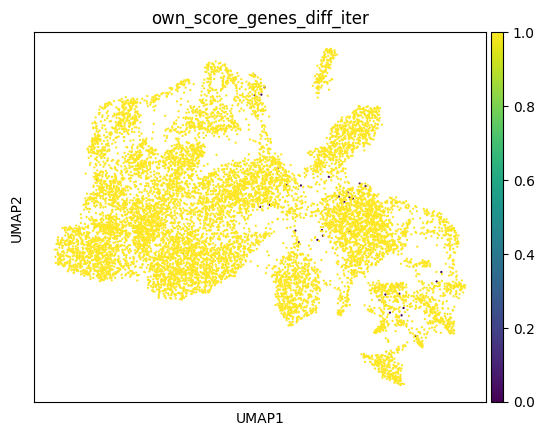

0.003384396152475953


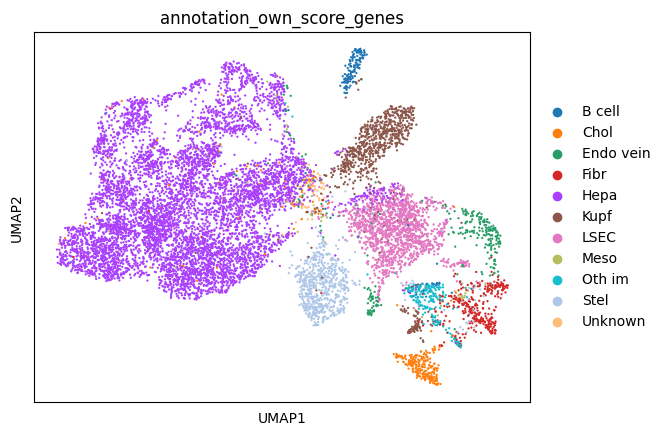

Hepa         0.608301
LSEC         0.128874
Kupf         0.075525
Stel         0.059405
Fibr         0.029480
Chol         0.027877
Endo vein    0.024760
Oth im       0.018347
B cell       0.016744
Unknown      0.006056
Meso         0.004631
Name: annotation_own_score_genes, dtype: float64


[0.052725329533309585,
 0.007570359814748842,
 0.003740648379052369,
 0.004631278945493409,
 0.003384396152475953]

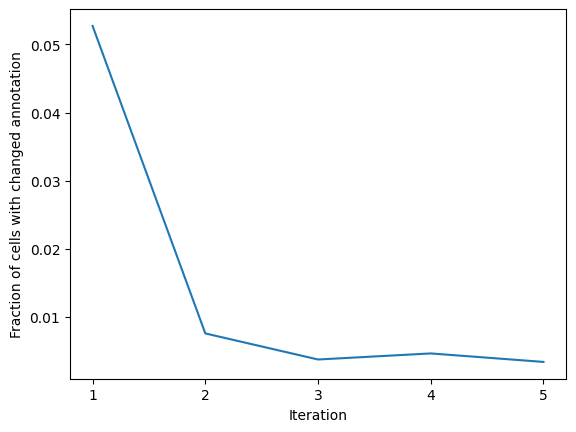

In [7]:
# Own score genes with HL marker gene list and iterative
own_score_genes_iterative(sdata.table,path_mg,nr_iterations=5)

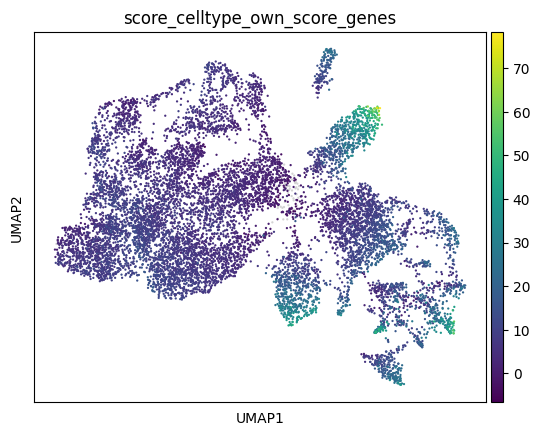

In [8]:
sc.pl.umap(sdata.table,color=['score_celltype_own_score_genes'])

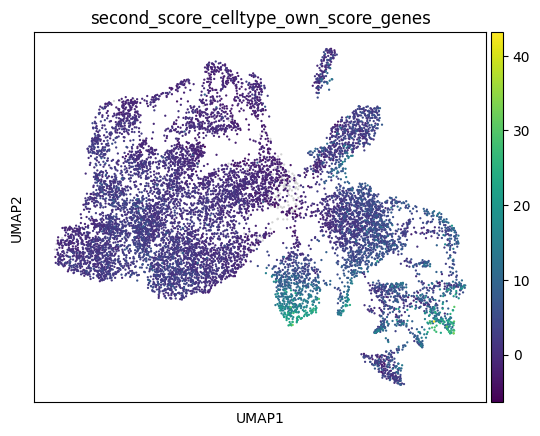

In [9]:
sc.pl.umap(sdata.table,color=['second_score_celltype_own_score_genes'])

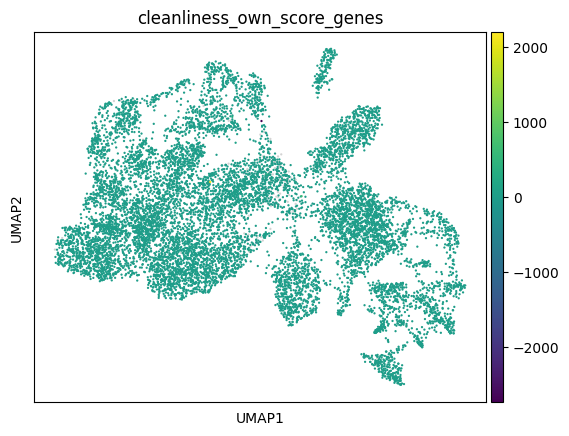

In [10]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes'])

Hepa          8.669
LSEC          9.333
Endo vein     7.250
Chol          7.500
Kupf         19.500
Stel         16.001
Fibr         17.625
B cell        4.500
Meso          6.000
Oth im        4.000
dtype: float64


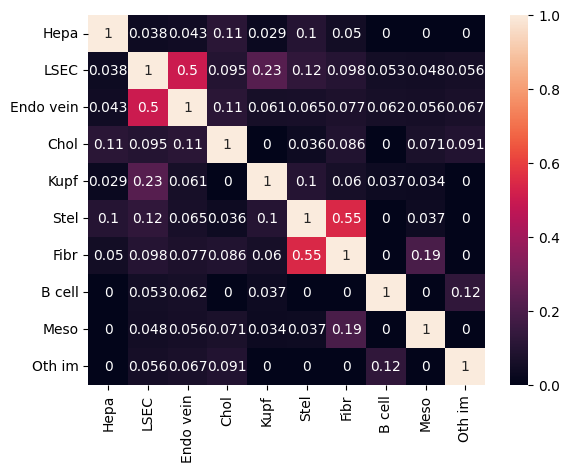

In [11]:
Jaccard_similarity_matrix(path_mg)

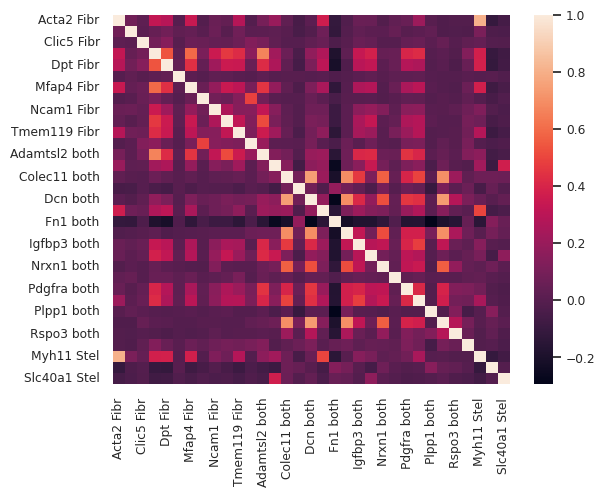

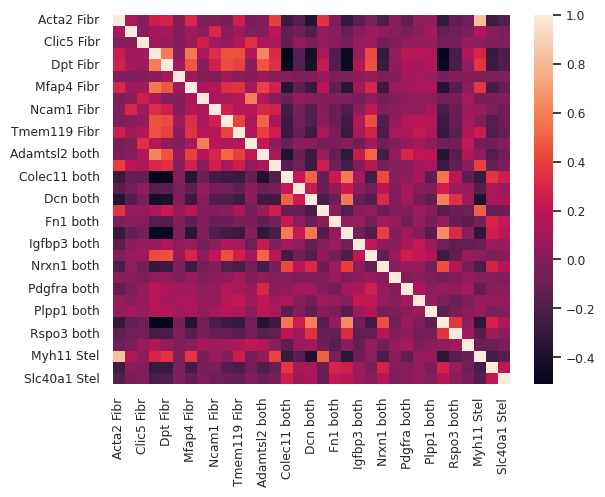

In [12]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between fibroblasts and stellate cells
# expression of all cells
sns.set(font_scale=0.8)
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'Fibr','Stel')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'Fibr') | (sdata.table.obs['annotation_own_score_genes'] == 'Stel'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'Fibr','Stel')

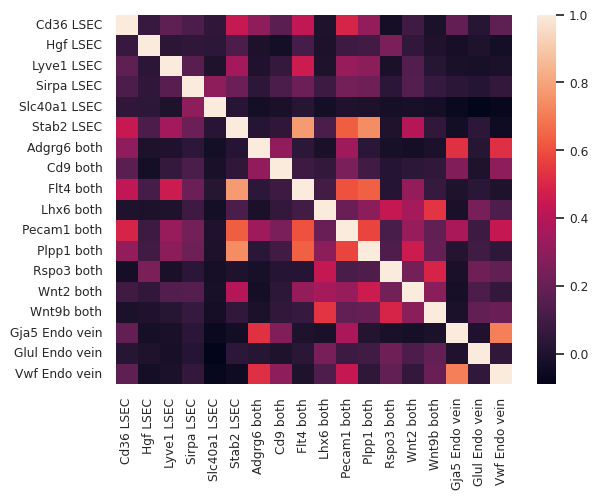

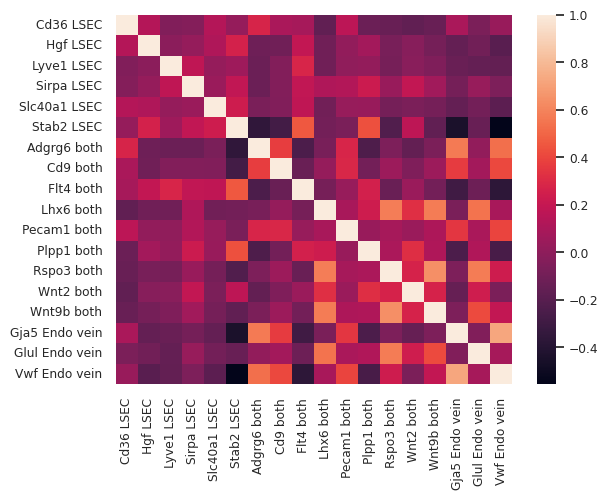

In [13]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between LSECs and Endo vein cells
# expression of all cells
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'LSEC','Endo vein')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'LSEC') | (sdata.table.obs['annotation_own_score_genes'] == 'Endo vein'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'LSEC','Endo vein')

<AxesSubplot: >

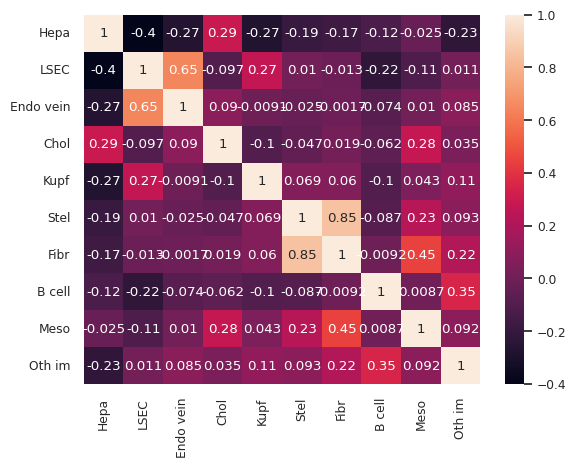

In [14]:
# plot correlation matrix of the features
sns.heatmap(scores.corr(method='pearson'), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

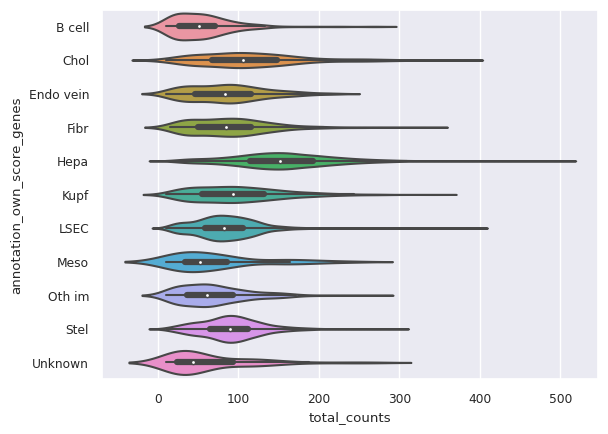

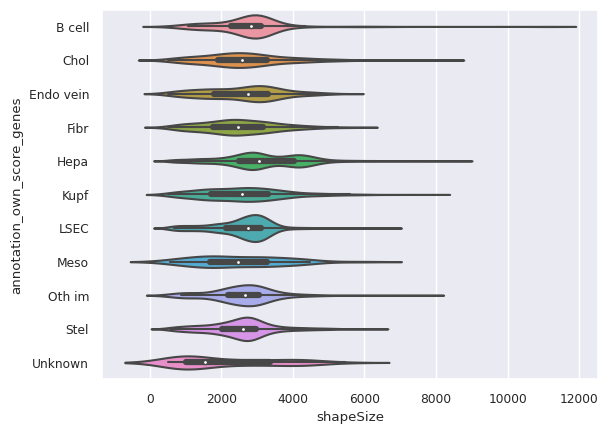

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

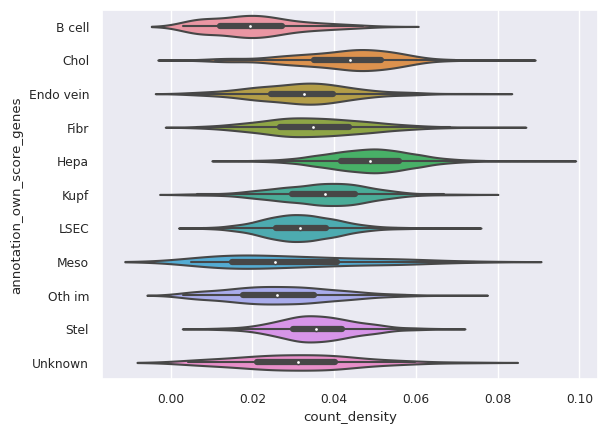

In [15]:
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=sdata.table.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
sdata.table.obs['count_density'] = sdata.table.obs['total_counts'] / sdata.table.obs['shapeSize']
sns.violinplot(data=sdata.table.obs,x="count_density",y="annotation_own_score_genes")

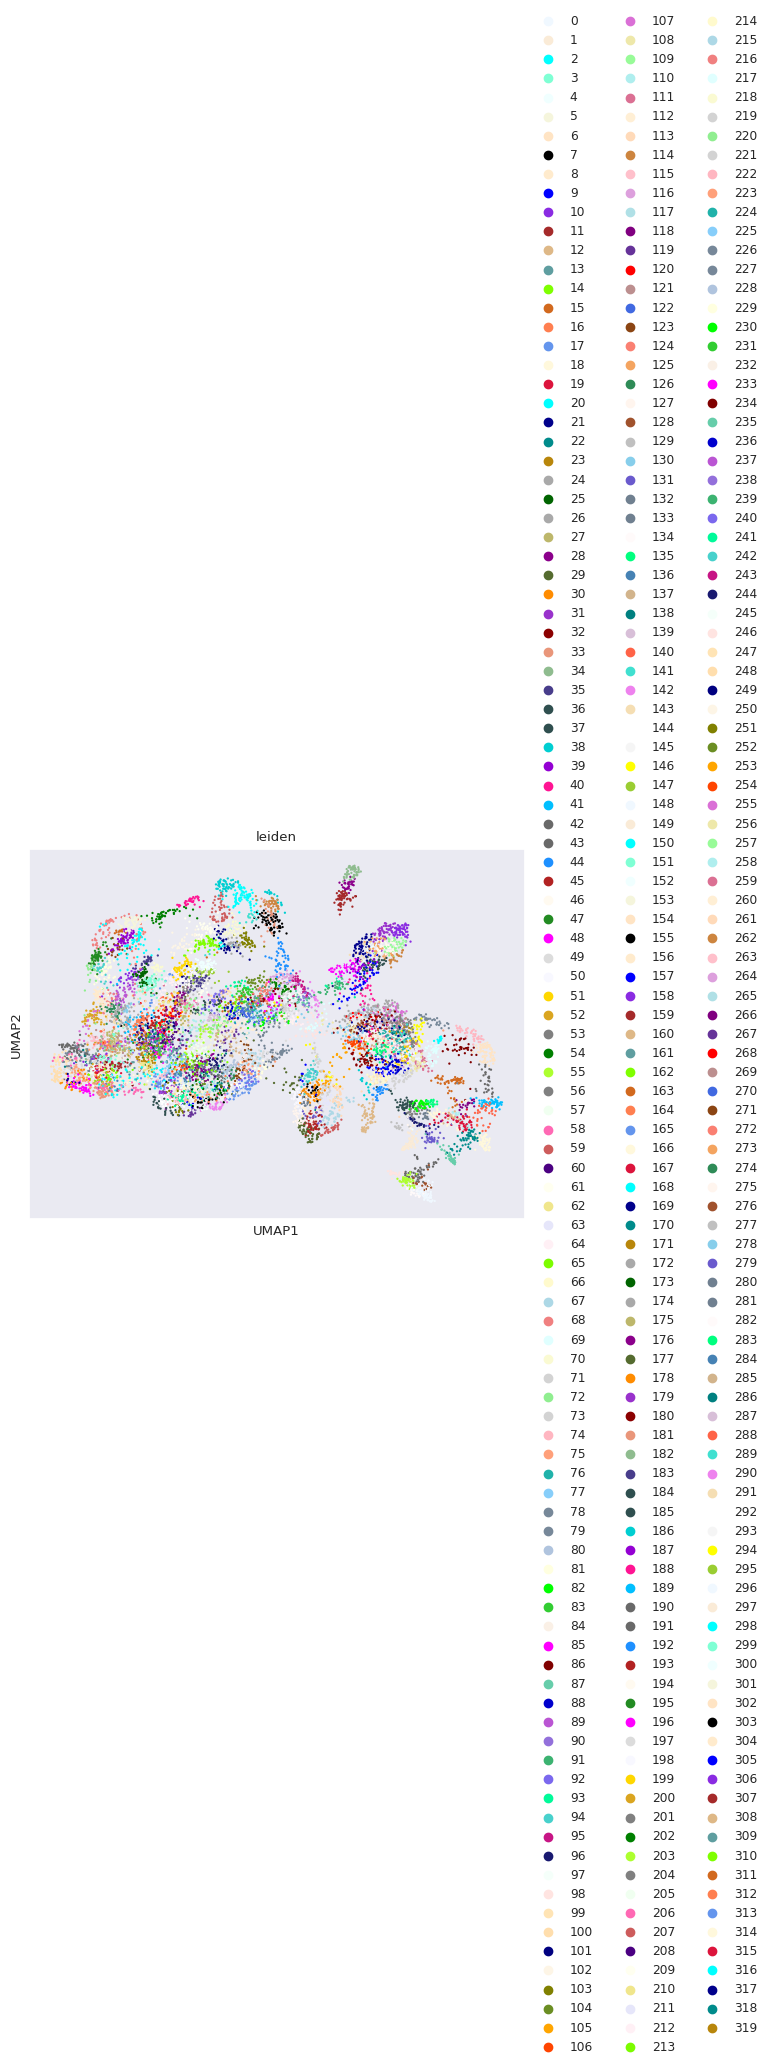

In [16]:
sc.tl.leiden(sdata.table,resolution=30,key_added='leiden')
sc.pl.umap(sdata.table,color='leiden',palette=list(matplotlib.colors.CSS4_COLORS.values()))

Index(['B cell', 'Chol', 'Endo vein', 'Fibr', 'Hepa', 'Kupf', 'LSEC', 'Meso',
       'Oth im', 'Stel', 'Unknown'],
      dtype='object')
Hepa
[2, 3, 4, 5, 7, 8, 13, 14, 16, 17, 20, 23, 24, 25, 26, 27, 28, 33, 35, 38, 39, 42, 44, 47, 49, 51, 52, 54, 57, 58, 59, 60, 61, 62, 64, 65, 68, 70, 72, 73, 75, 77, 78, 80, 81, 83, 84, 85, 89, 90, 92, 93, 95, 96, 97, 99, 100, 101, 102, 103, 104, 110, 112, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 126, 132, 133, 134, 136, 137, 138, 139, 142, 143, 144, 145, 147, 149, 150, 151, 152, 153, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 170, 171, 172, 173, 174, 175, 178, 179, 180, 181, 182, 183, 184, 185, 188, 189, 190, 193, 195, 196, 197, 200, 202, 203, 204, 205, 206, 208, 209, 210, 213, 214, 215, 216, 218, 220, 222, 223, 224, 225, 226, 227, 229, 230, 231, 232, 233, 236, 237, 239, 240, 242, 243, 245, 248, 249, 251, 252, 253, 254, 255, 257, 259, 263, 265, 267, 268, 269, 270, 271, 272, 273, 274, 277, 278, 284, 288, 289, 292, 293, 295,

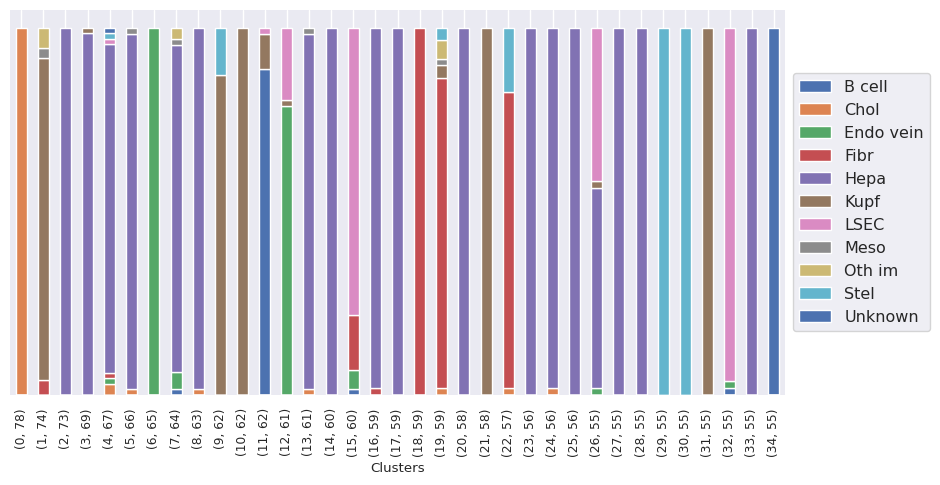

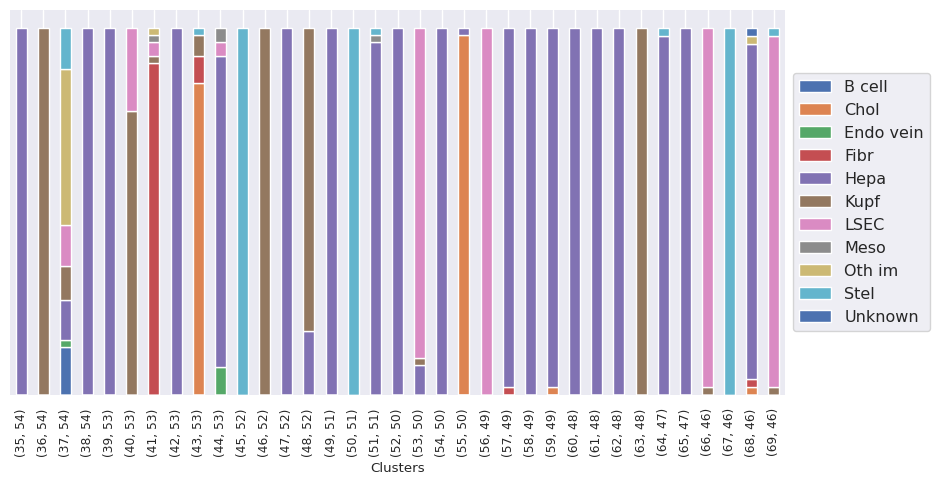

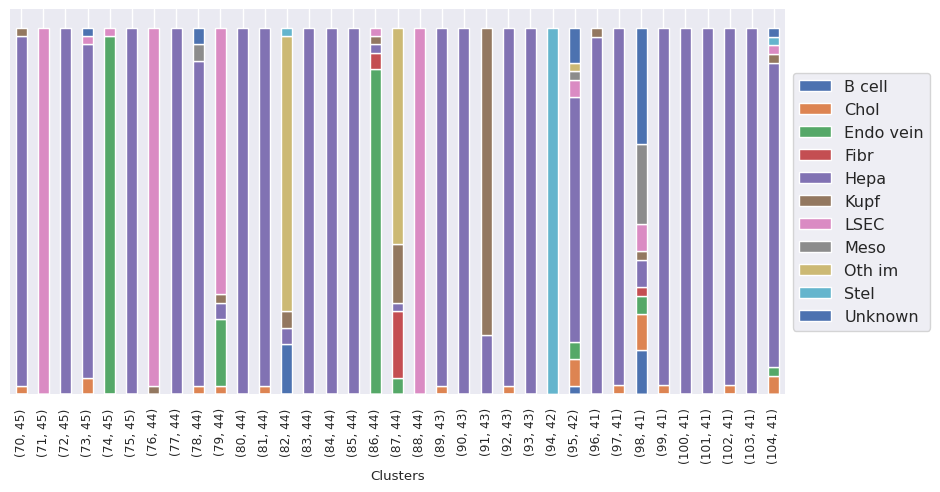

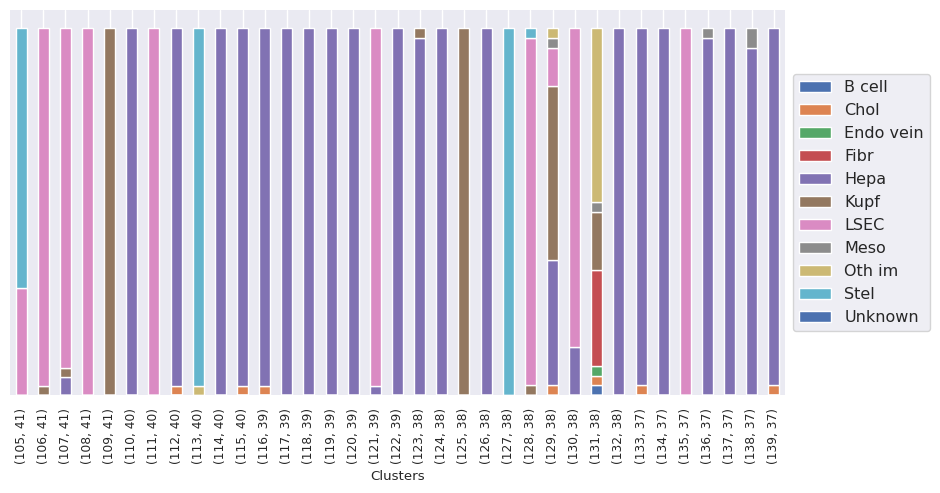

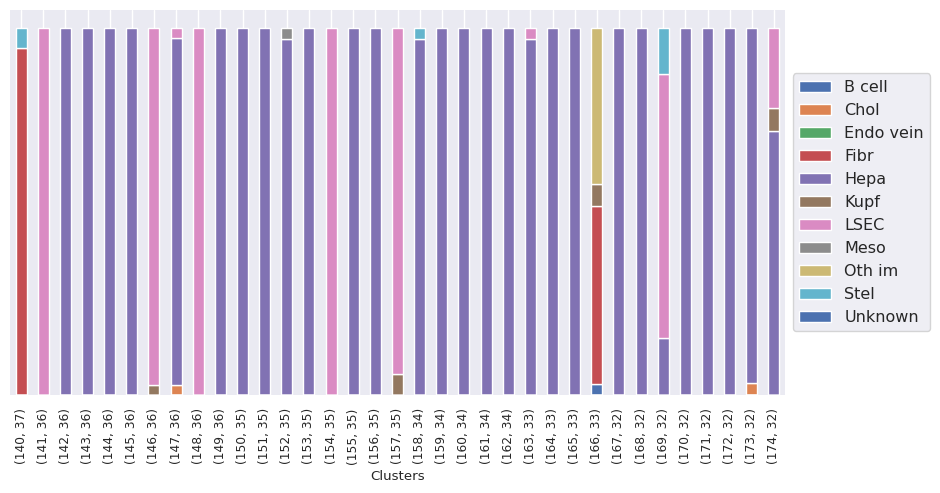

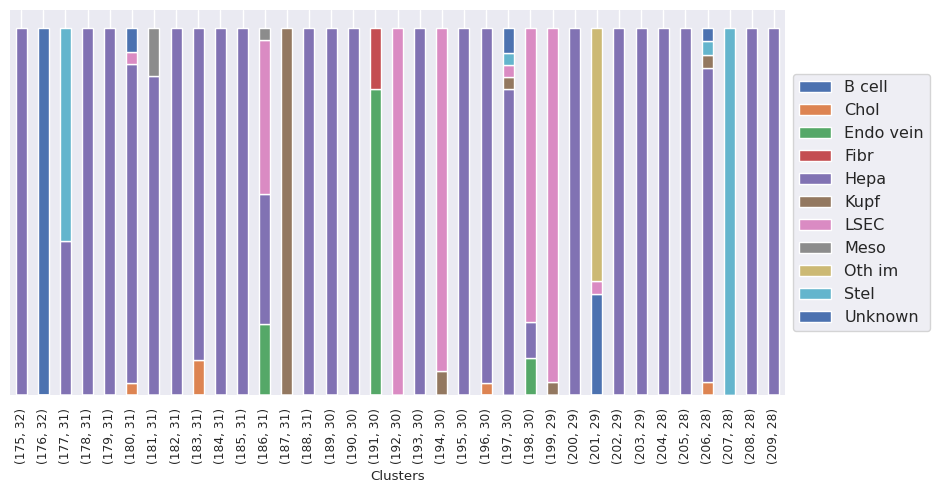

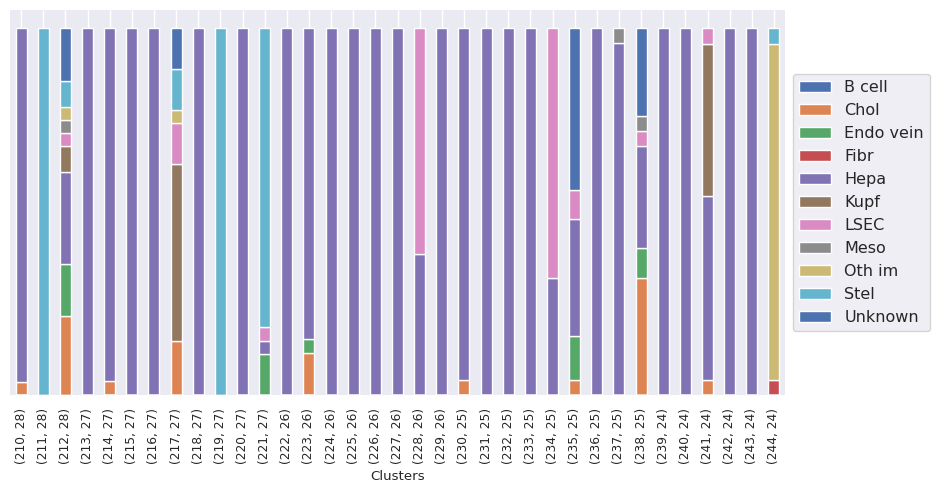

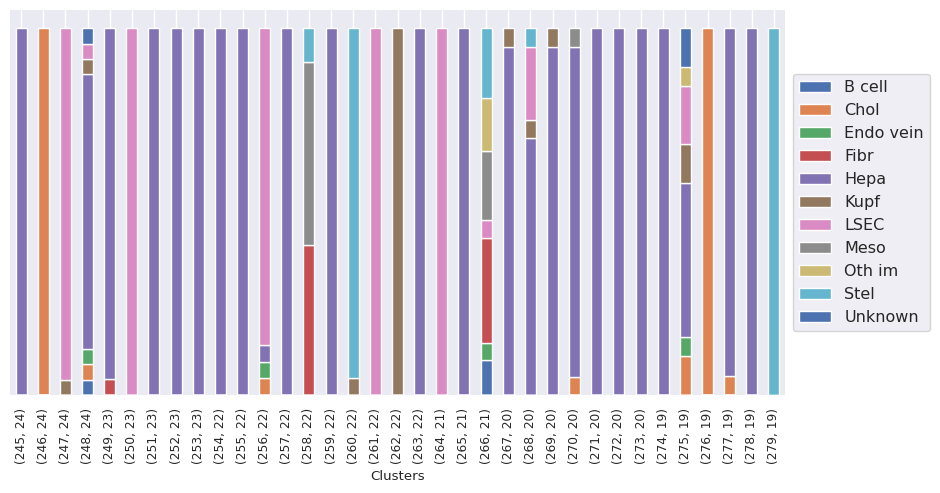

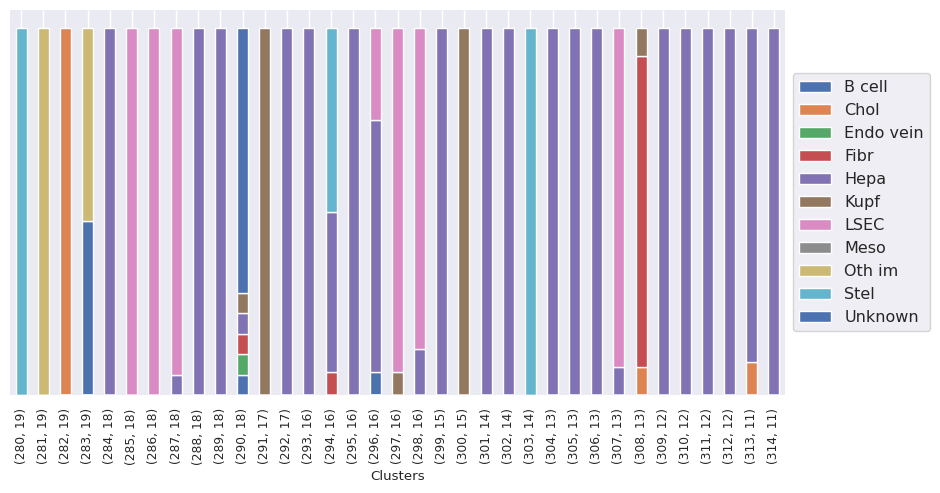

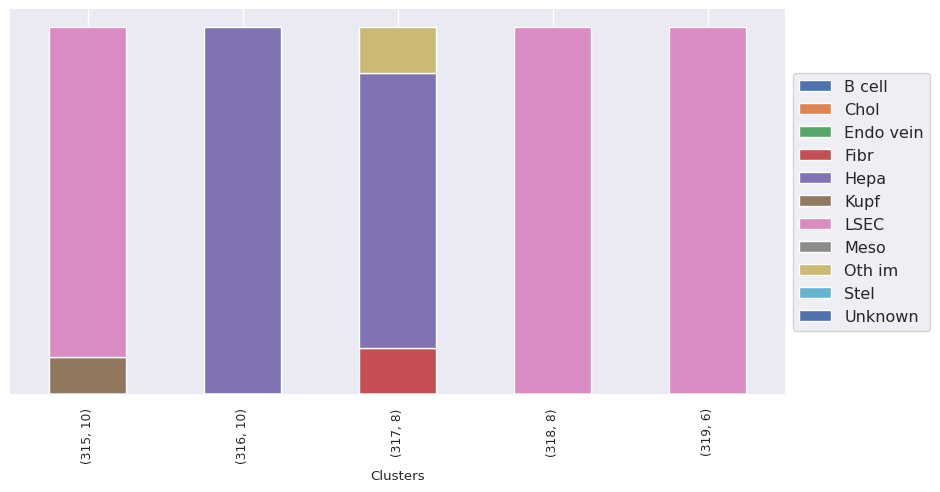

In [17]:
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell','Oth im','Unknown']
leiden_clusters_per_ct = clusteringVSleiden(sdata.table, "annotation_own_score_genes", "leiden",cell_types)

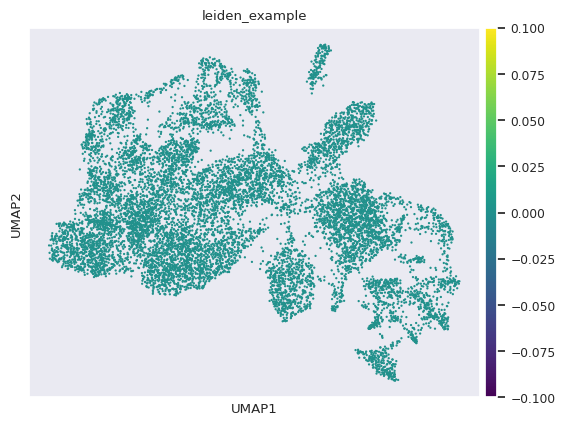

In [18]:
# Meso
sdata.table.obs['leiden_example'] = sdata.table.obs['leiden'].isin([str(x) for x in leiden_clusters_per_ct[6]]).astype(int)
sc.pl.umap(sdata.table,color=['leiden_example'],color_map='viridis')

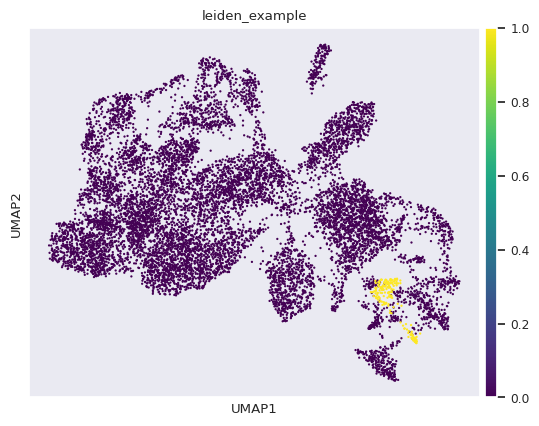

In [19]:
# Oth im
sdata.table.obs['leiden_example'] = sdata.table.obs['leiden'].isin([str(x) for x in leiden_clusters_per_ct[9]]).astype(int)
sc.pl.umap(sdata.table,color=['leiden_example'],color_map='viridis')

In [20]:
a = sdata.table.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters_per_ct:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
sdata.table.obs['leiden_cell_types'] = a
# cells per leiden_cell_type cluster, to see the max number of n_cells you can take per cluster (149 in this case)
print(sdata.table.obs['leiden_cell_types'].value_counts())
min_cells_per_leiden_cell_type = sdata.table.obs['leiden_cell_types'].value_counts().min()
print(min_cells_per_leiden_cell_type)

Hepa         6849
LSEC         1413
Kupf          777
Stel          635
Unknown       460
Fibr          278
Endo vein     245
Chol          243
Oth im        179
B cell        149
Name: leiden_cell_types, dtype: int64
149


In [21]:
# STRATEGY 1 to change the marker gene list
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,min_cells_per_leiden_cell_type,1)

ValueError: Sample larger than population or is negative

In [ ]:
# Update marker gene list based on STRATEGY 1:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified1.csv")

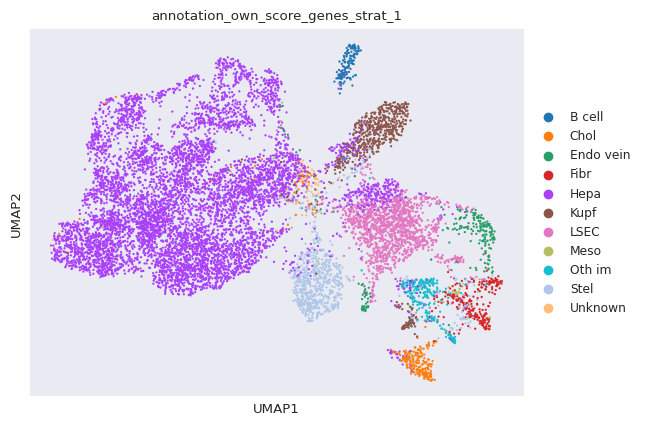

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1
B cell                               1.433915
Chol                                 2.280014
Endo vein                            1.968294
Fibr                                 2.324546
Hepa                                64.285714
Kupf                                 5.717848
LSEC                                12.548985
Meso                                 0.400784
Oth im                               2.119701
Stel                                 6.492697
Unknown                              0.427503


In [ ]:
# Own score genes with modified marker gene list based on STRATREGY 1
path_mg_mod1 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified1.csv"
scores = own_score_genes(sdata.table,path_mg_mod1,suffix='_strat_1')
visualize_classification(sdata,'annotation_own_score_genes_strat_1','umap_23_15',path_mg_mod1,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

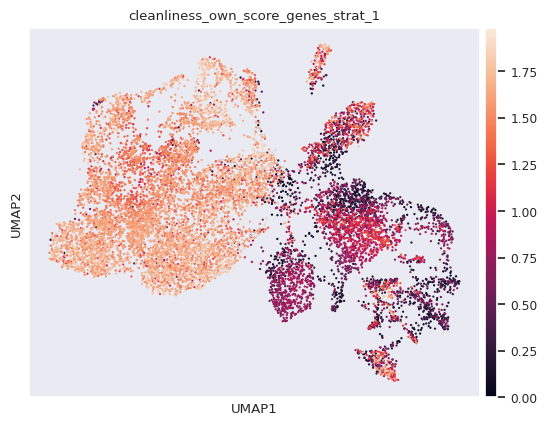

In [ ]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1'])

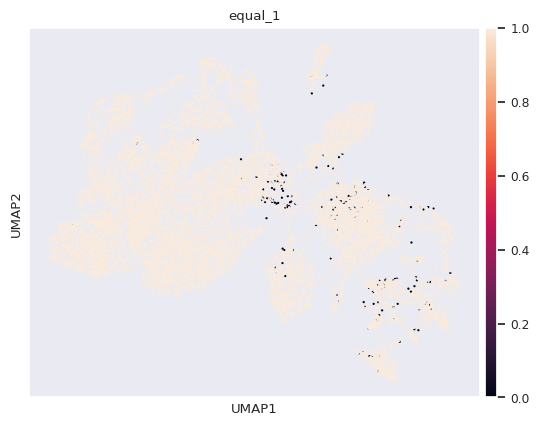

In [ ]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1'])

Hepa          8.669
LSEC          8.333
Endo vein     7.250
Chol          6.500
Kupf         19.500
Stel         15.001
Fibr         15.625
B cell        3.500
Meso          6.000
Oth im        4.000
dtype: float64


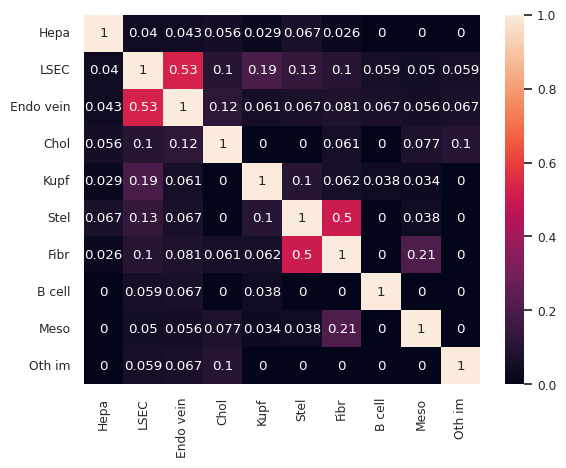

In [ ]:
Jaccard_similarity_matrix(path_mg_mod1)

Adamtsl2
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Cd36
Is marker gene of: []
Could also be a marker gene of: ['Endo vein']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Meso']
Myh11
Is marker gene of: []
Could also be a marker gene of: ['Fibr']
Spon2
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Summary:
Meso
Maybe add:['Adamtsl2', 'Col1a1', 'Spon2']
Endo vein
Maybe add:['Cd36']
Fibr
Maybe add:['Myh11']
Adamtsl2
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Meso']
Dpt
Is marker gene of: []
Could also be a marker gene of: ['Chol']
Myh11
Is marker gene of: []
Could also be a marker gene of: ['Fibr']
Sirpa
Is marker gene of: ['LSEC', 'Kupf']
Could also be a marker gene of: ['Chol']
Spon2
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Summary:
Meso
Maybe add:['Adamtsl2', 'Col1a1', 'Spon2']
Chol
Maybe add:['Dpt', 'Sirpa']
Fibr
Ma

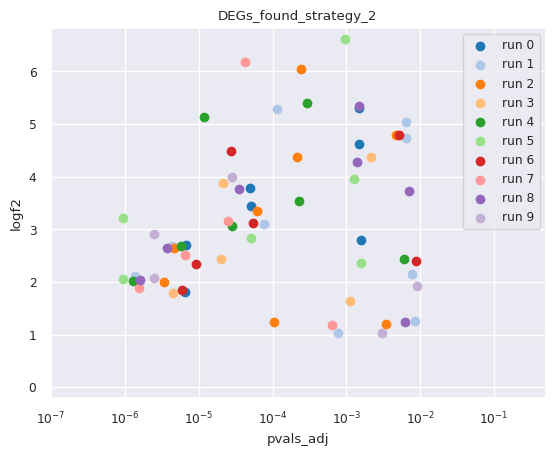

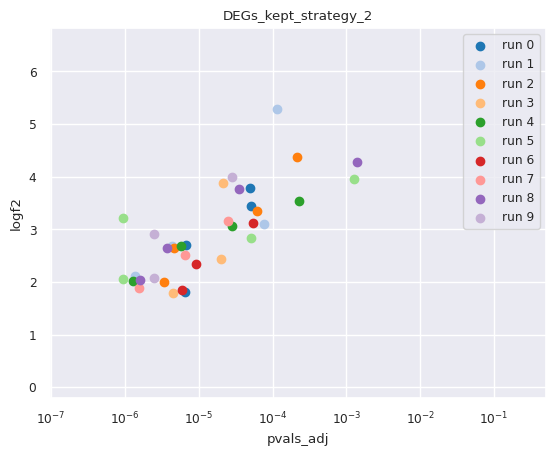

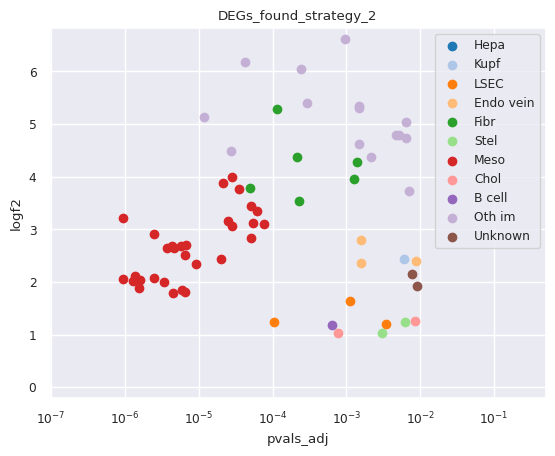

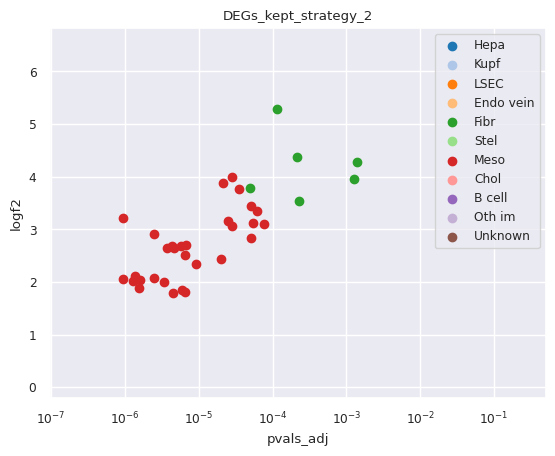

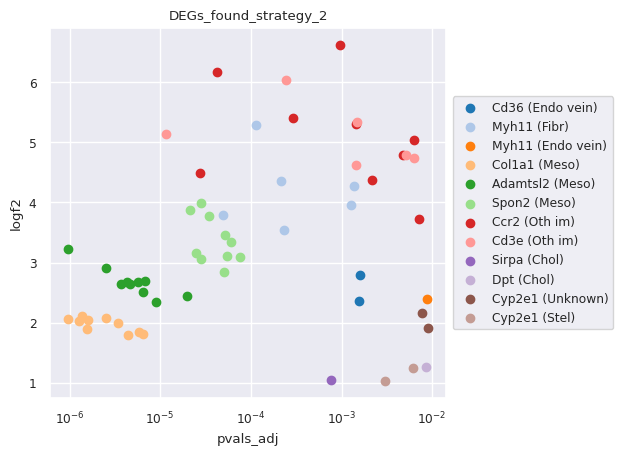

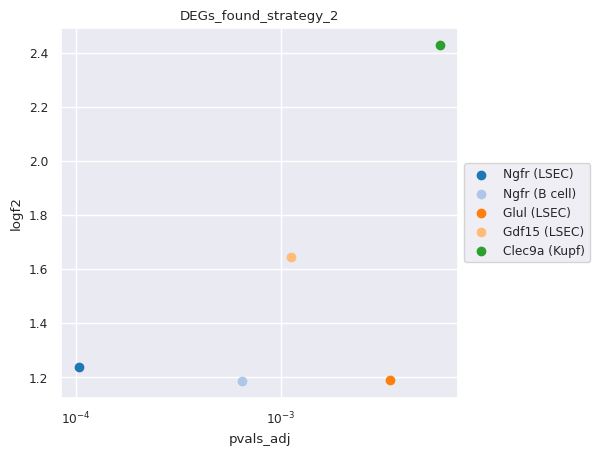

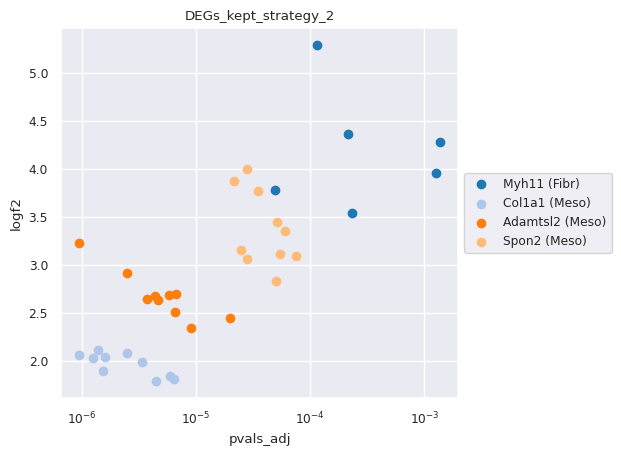

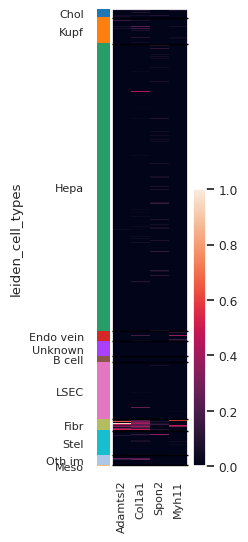

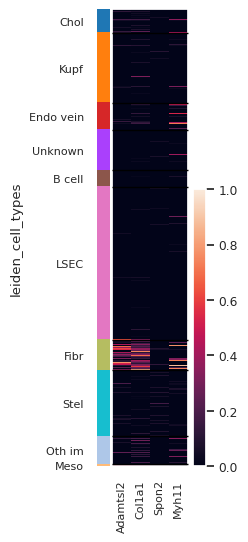

In [ ]:
# STRATEGY 2 to change the marker gene list
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,min_cells_per_leiden_cell_type,2)

In [ ]:
# Update marker gene list based on STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified2.csv")

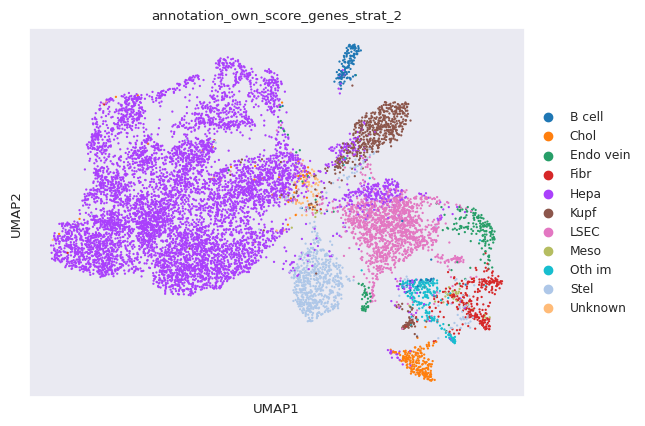

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_2
B cell                               1.522978
Chol                                 2.324546
Endo vein                            1.959387
Fibr                                 2.591735
Hepa                                64.232276
Kupf                                 5.673317
LSEC                                12.575704
Meso                                 0.391877
Oth im                               1.914856
Stel                                 6.207695
Unknown                              0.605629


In [ ]:
# Own score genes with modified marker gene list based on STRATREGY 2
path_mg_mod2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified2.csv"
scores = own_score_genes(sdata.table,path_mg_mod2,suffix='_strat_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_2','umap_23_15',path_mg_mod2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

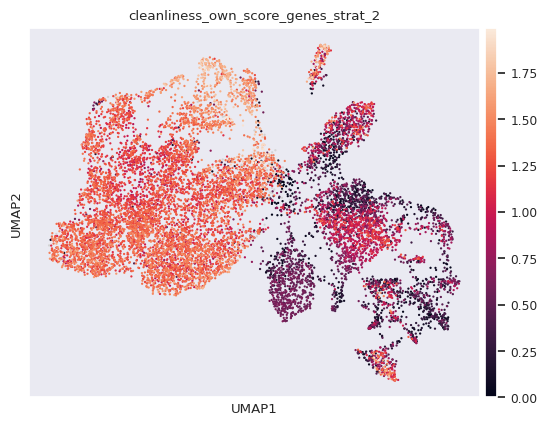

In [ ]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_2'])
# makes sense that this becomes worse, because more marker genes overlap between cell types
# but does not mean that the annotation is worse

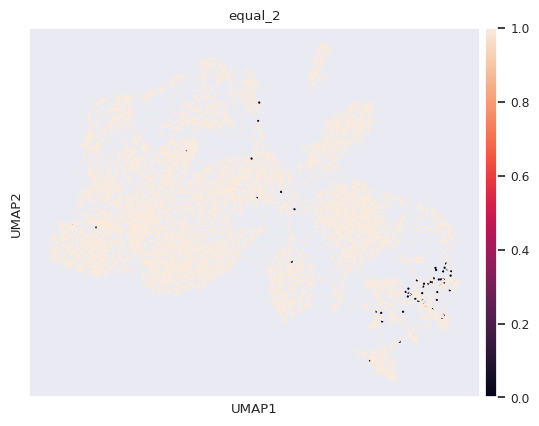

In [ ]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_2'])

Hepa          8.669
LSEC          9.333
Endo vein     7.250
Chol          7.500
Kupf         19.500
Stel         16.001
Fibr         18.625
B cell        4.500
Meso          9.000
Oth im        4.000
dtype: float64


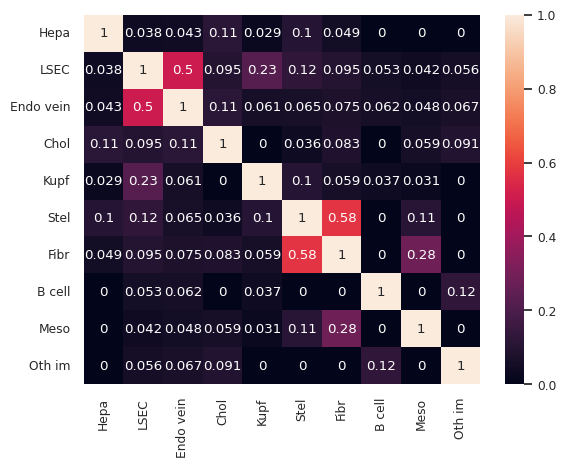

In [ ]:
Jaccard_similarity_matrix(path_mg_mod2)

In [ ]:
# STRATEGY 1 and STRATEGY 2 combined to change the marker gene list

In [ ]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified_1_2.csv")

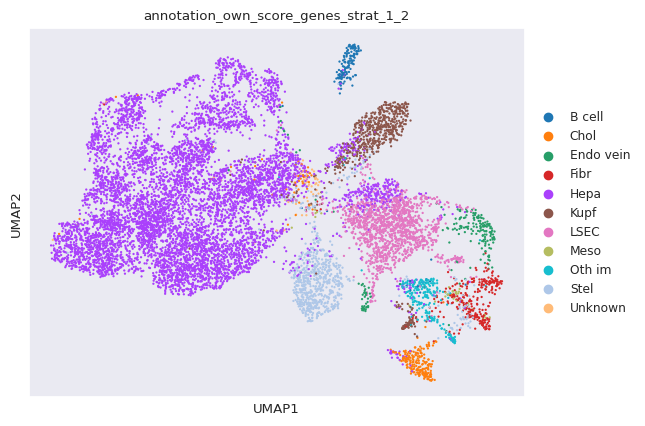

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1_2
B cell                                 1.433915
Chol                                   2.333452
Endo vein                              1.897043
Fibr                                   2.475953
Hepa                                  64.321340
Kupf                                   5.726755
LSEC                                  12.513359
Meso                                   0.382971
Oth im                                 2.084076
Stel                                   6.403634
Unknown                                0.427503


In [ ]:
# Own score genes with modified marker gene list based on STRATREGY 1 and STRATEGY 2
path_mg_mod_1_2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified_1_2.csv"
scores = own_score_genes(sdata.table,path_mg_mod_1_2,suffix='_strat_1_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_1_2','umap_23_15',path_mg_mod_1_2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

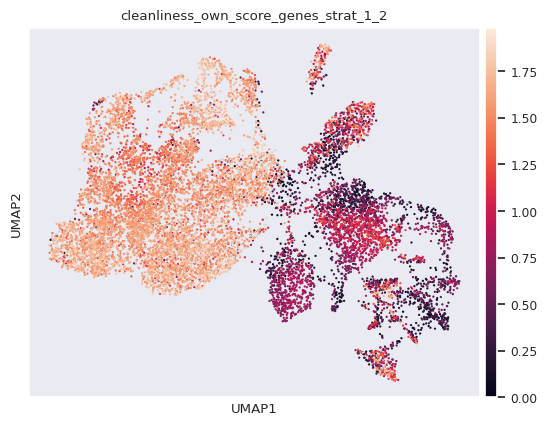

In [ ]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1_2'])

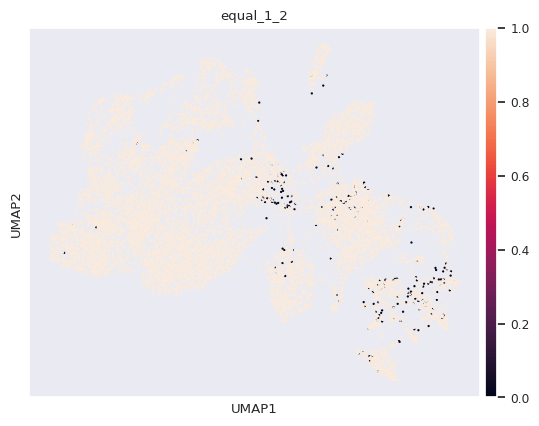

In [ ]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1_2'])

Hepa          8.669
LSEC          8.333
Endo vein     7.250
Chol          6.500
Kupf         19.500
Stel         15.001
Fibr         16.625
B cell        3.500
Meso          9.000
Oth im        4.000
dtype: float64


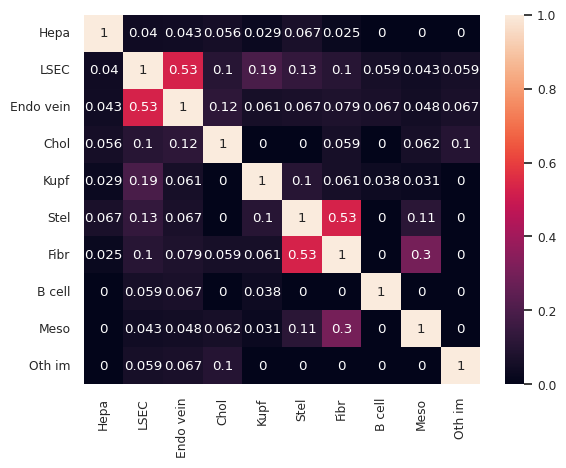

In [ ]:
Jaccard_similarity_matrix(path_mg_mod_1_2)